In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

In [38]:
def plot_feature_importacnes_cancer(model):
    n_features=cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

In [9]:
cancer=load_breast_cancer()

In [12]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [18]:
X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [25]:
tree=DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [26]:
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [27]:
tree.score(X_train,y_train)

0.9882629107981221

In [28]:
tree.score(X_test,y_test)

0.951048951048951

In [34]:
plt.rcParams['font.family']="Malgun Gothic"
plt.rcParams['axes.unicode_minus']=False

[Text(0.5735294117647058, 0.9, 'worst radius <= 16.795\nsamples = 426\nvalue = [159, 267]\nclass = 양성'),
 Text(0.3235294117647059, 0.7, 'worst concave points <= 0.136\nsamples = 284\nvalue = [25, 259]\nclass = 양성'),
 Text(0.17647058823529413, 0.5, 'radius error <= 1.048\nsamples = 252\nvalue = [4, 248]\nclass = 양성'),
 Text(0.11764705882352941, 0.3, 'smoothness error <= 0.003\nsamples = 251\nvalue = [3, 248]\nclass = 양성'),
 Text(0.058823529411764705, 0.1, 'samples = 4\nvalue = [1, 3]\nclass = 양성'),
 Text(0.17647058823529413, 0.1, 'samples = 247\nvalue = [2, 245]\nclass = 양성'),
 Text(0.23529411764705882, 0.3, 'samples = 1\nvalue = [1, 0]\nclass = 악성'),
 Text(0.47058823529411764, 0.5, 'worst texture <= 25.62\nsamples = 32\nvalue = [21, 11]\nclass = 악성'),
 Text(0.35294117647058826, 0.3, 'worst smoothness <= 0.179\nsamples = 12\nvalue = [3, 9]\nclass = 양성'),
 Text(0.29411764705882354, 0.1, 'samples = 10\nvalue = [1, 9]\nclass = 양성'),
 Text(0.4117647058823529, 0.1, 'samples = 2\nvalue = [2, 

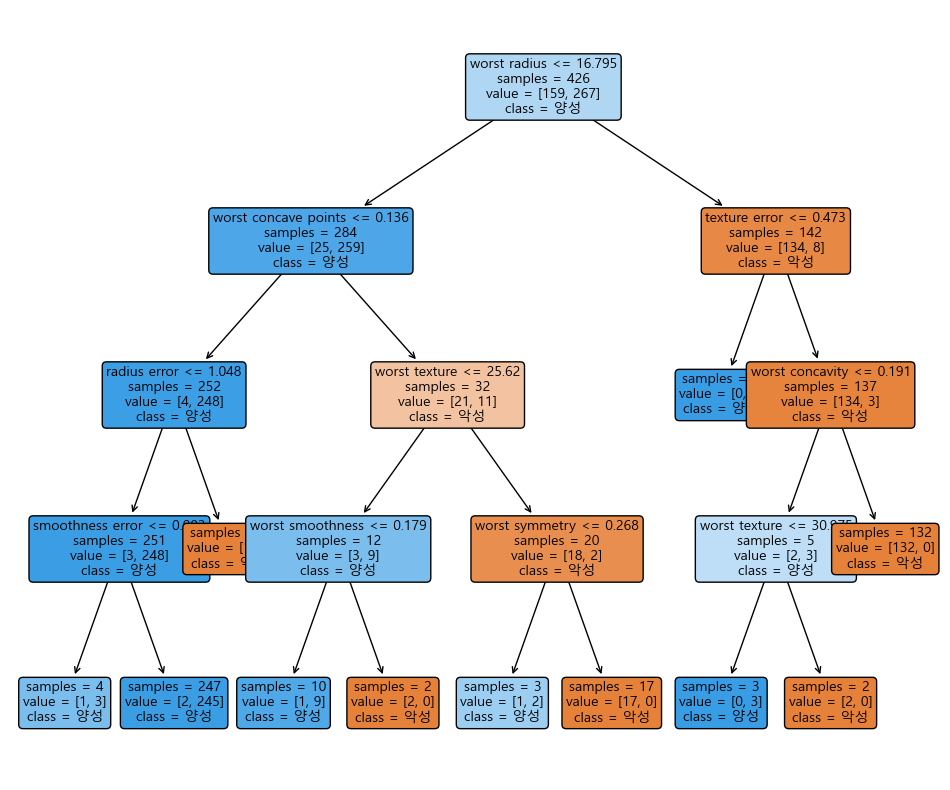

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plot_tree(tree, class_names=["악성","양성"],
          feature_names = cancer.feature_names.tolist(),
          impurity=False, filled=True, rounded=True, fontsize=10)

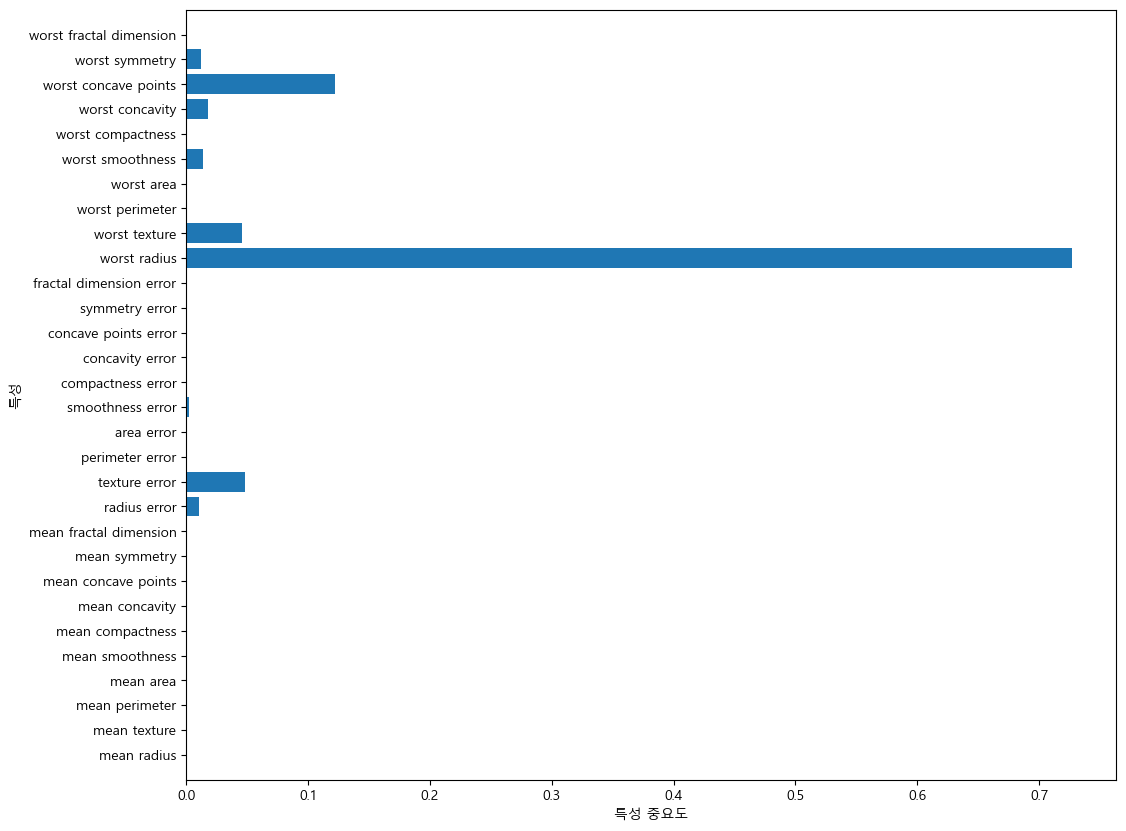

In [42]:
plt.figure(figsize=(12,10))
plot_feature_importacnes_cancer(tree)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [59]:
forest.score(X_train,y_train)

1.0

In [60]:
forest.score(X_test,y_test)

0.88

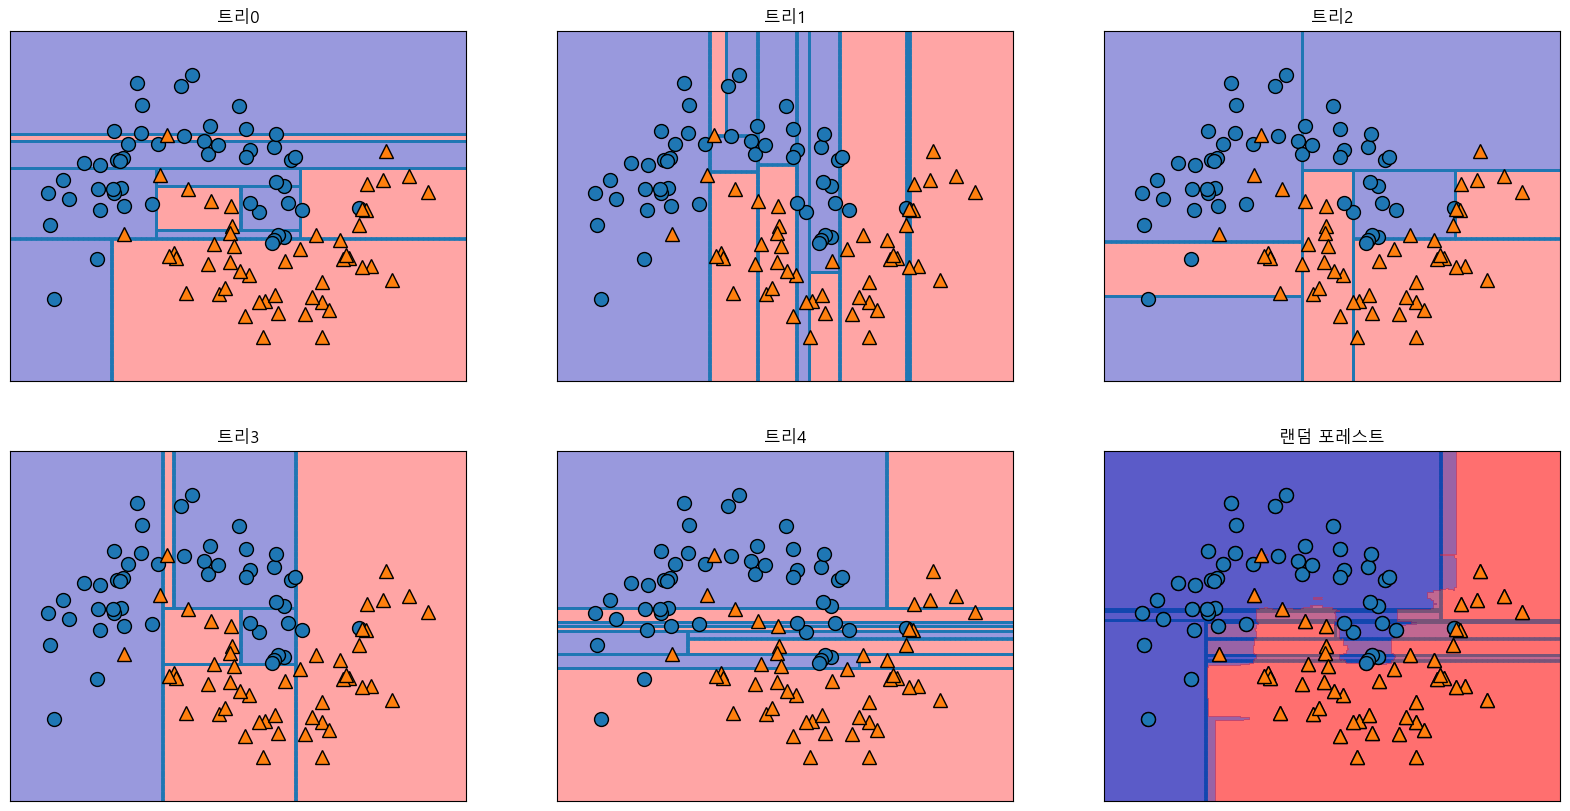

In [57]:
fig,axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"트리{i}")
    mglearn.plots.plot_tree_partition(X,y,tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0], X[:,1], y)